Developer survey data analysis

In [516]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [517]:
data=pd.read_csv("survey_results_public.csv")

Exploring the dataset

In [518]:
data.shape #to get the no of rows and columns in the data

(89184, 84)

In [519]:
data.info() #to get the column names and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [520]:
data.head(20) #to access the first 20 rows

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [521]:
data.tail() #to get the last elements default no of elements is 5

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5,"Developer, front-end",100 to 499 employees,I have some influence,Investigate,NaN,Brazil,BRL\tBrazilian real,2.000000e+05,HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,MongoDB;MySQL;PostgreSQL;SQLite,PostgreSQL;SQLite,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,Amazon Web Services (AWS);Heroku;Netlify;Vercel,Angular;AngularJS;Express;jQuery;Node.js;Nuxt....,Express;Node.js;Nuxt.js;Svelte;Vue.js,Flutter,NaN,Chocolatey;CMake;Docker;Maven (build tool);npm...,Docker;npm;Pip;Vite;Yarn,Android Studio;Atom;Eclipse;IntelliJ IDEA;Netb...,Visual Studio Code,Android;Windows,Android;Ubuntu;Windows,Asana;Confluence;Jira;Markdown File;Miro;Notio...,Markdown File;Miro;Wikis,Discord;Google Meet;Jitsi;Microsoft Teams;Slac...,Discord;Google Meet;Jitsi;Microsoft Teams;Tele...,ChatGPT,ChatGPT,Whispr AI,Whispr AI,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,Neutral,NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Learning about a codebase;Project planning;Wri...,Writing code;Documenting code;Debugging and ge...,Deployment and monitoring,NaN,NaN,NaN,NaN,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,"Developer, back-end",NaN,NaN,Investigate,Start a free trial;Ask developers I know/work ...,Romania,NaN,NaN,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,PostgreSQL,PostgreSQL,NaN,NaN,Spring Boot,Spring Boot,Flutter;Opencv;RabbitMQ;Spring Framework;Torch...,RabbitMQ;Spring Framework;Torch/PyTorch,Maven (build tool);Pip,Maven (build tool);Pip,Android Studio;IntelliJ IDEA;PyCharm,IntelliJ IDEA;PyCharm,Windows,Windows,Jira,Jira,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, not really",I'm not sure

In [522]:
data #rows and columns are truncated

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back

In [523]:
pd.set_option('display.max_columns',85) #to display all 85 columns
data

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back

Performing simple analysis

In [524]:
data['Employment'] #to view the contents of a specific column

0                                                      NaN
1                                      Employed, full-time
2                                      Employed, full-time
3                                      Employed, full-time
4        Employed, full-time;Independent contractor, fr...
                               ...                        
89179    Employed, full-time;Independent contractor, fr...
89180               Student, full-time;Employed, part-time
89181                                  I prefer not to say
89182               Employed, part-time;Student, part-time
89183                                  Employed, full-time
Name: Employment, Length: 89184, dtype: object

In [525]:
data.Employment.value_counts #to find unique values in the employment column

<bound method IndexOpsMixin.value_counts of 0                                                      NaN
1                                      Employed, full-time
2                                      Employed, full-time
3                                      Employed, full-time
4        Employed, full-time;Independent contractor, fr...
                               ...                        
89179    Employed, full-time;Independent contractor, fr...
89180               Student, full-time;Employed, part-time
89181                                  I prefer not to say
89182               Employed, part-time;Student, part-time
89183                                  Employed, full-time
Name: Employment, Length: 89184, dtype: object>

In [526]:
data['OpSysProfessional use'].value_counts() #finding which OS is mostly used by developers

OpSysProfessional use
Windows                                                                                  15943
MacOS                                                                                    12928
Ubuntu                                                                                    5201
Windows;Windows Subsystem for Linux (WSL)                                                 3934
Ubuntu;Windows                                                                            2795
                                                                                         ...  
BSD;Fedora;MacOS;Red Hat;Solaris                                                             1
AIX;Android;iOS;iPadOS;MacOS;Red Hat;Ubuntu;Windows;Windows Subsystem for Linux (WSL)        1
AIX;Android;Ubuntu;Windows;Windows Subsystem for Linux (WSL)                                 1
BSD;Debian;Windows                                                                           1
Android;Debian;Fedora;iOS;Re

In [527]:
data.Employment[182] #finding the employment status of a particular employee with their ID

'Student, full-time'

In [528]:
data['DevType'].value_counts() #finding which developer roles are trending

DevType
Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Developer, game or graphics                        866
Data or business analyst                           837
Sy

In [529]:
data[data['OpSysProfessional use']=="MacOS"] #getting rows where the developers use "MacOS"

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,"Developer, back-end",100 to 499 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,78000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,NaN,Amazon Web Services (AWS);Cloudflare;Google Cloud,NaN,Angular;Express;NestJS;Node.js,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,Cargo,Helix;Neovim,NaN,Other (Please Specify):,MacOS,Jira;Markdown File;Notion;Stack Overflow for T...,NaN,Google Meet;Microsoft Teams;Slack;Zoom,NaN,ChatGPT;Google Bard AI;Neeva AI,NaN,GitHub Copilot;Tabnine,NaN,Stack Overflow,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...,"No, not at all",NaN,Yes,Favorable,Greater efficiency,Somewhat trust,Learning about a codebase;Documenting code;Tes...,Writing code;Debugging and getting help,Project planning,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,22.0,Agree,Strongly agree,Disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Disagree,Disagree,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,Udemy,4,3,"Developer, full-stack","1,000 to 4,999 employees",I have little or no influence,NaN,Ask developers I know/work with;Read ratings o...,United States of America,USD\tUnited States dollar,135000.0,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,NaN,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Datomic,Amazon Web Services (AWS);Digital Ocean,Vercel,AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...,NaN,RabbitMQ;Spring Framework,NaN,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,NaN,Emacs;IntelliJ IDEA;RubyMine;Visual Studio Cod...,NaN,MacOS;Windows,MacOS,Jira,NaN,Slack,NaN,ChatGPT,NaN,GitHub Copilot,NaN,Stack Overflow,A few times per month or weekly,Yes,Less than once per month or monthly,Neutral,Neutral,Yes,Unfavorable,Improve accuracy in coding,Somewhat distrust,NaN,Wri

In [530]:
data['Country'].value_counts() #finding the no of developers based on the country

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Samoa                                                       1
Marshall Islands                                            1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [531]:
usa_data=data[data['Country']=="United States of America"]

In [532]:
usa_data

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Heli

In [533]:
india_data=data[data['Country']=="India"]
india_data

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
9,10,I agree,I am a developer by profession,25-34 years old,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,edX;Udemy;Pluralsight;Coursera;Udacity,6,NaN,"Developer, full-stack",NaN,NaN,Investigate,Start a free trial;Research companies that hav...,India,NaN,NaN,HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,HTML/CSS;JavaScript;TypeScript,Cloud Firestore;MongoDB;MySQL;PostgreSQL;SQLite,Cloud Firestore;Firebase Realtime Database;Mon...,Amazon Web Services (AWS);Firebase;Google Clou...,Cloudflare;Firebase;Google Cloud;IBM Cloud Or ...,Angular;Express;NestJS;React,Deno;Express;FastAPI;Fastify;NestJS;Qwik;React...,NaN,NaN,Docker;npm;Vite;Webpack;Yarn,Docker;npm;Podman;Vite;Webpack;Yarn,Visual Studio Code,Visual Studio Code,Fedora;Other Linux-based;Ubuntu;Windows;Window...,Fedora;Other Linux-based;Red Hat;Windows;Windo...,Asana;Markdown File;Miro;Notion;Redmine;Trello,Asana;Markdown File;Miro;Notion;Redmine;Trello,Discord;Google Chat;Google Meet;Slack;Telegram,Discord;Google Chat;Google Meet;Telegram,Bing AI;ChatGPT,Bing AI;ChatGPT;Google Bard AI,AWS CodeWhisperer;GitHub Copilot;Tabnine,AWS CodeWhisperer;GitHub Copilot,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Neutral,AI could assist solving communication issues p...,Yes,Indifferent,Other (please explain);Increase productivity;G...,Neither trust nor distrust,Learning about a codebase;Documenting code;Com...,Writing code;Debugging and getting help,Project planning;Testing code;Deployment and m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
66,67,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Online Courses or Certification;School (i.e., ...",NaN,Codecademy;Udemy;Coursera,10,6,"Engineer, data",100 to 499 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,India,INR\tIndian rupee,3400000.0,Java;Scala;SQL,Go;Java;Scala;SQL,BigQuery;MariaDB;MongoDB;MySQL;PostgreSQL,BigQuery;Cassandra;Clickhouse;Dynamodb;MariaDB...,Amazon Web Services (AWS);Google Cloud,Amazon Web Services (AWS);Google Cloud,NaN,NaN,Apache Kafka;Apache Spark;Hadoop,Apache Kafka;Apache Spark;Hadoop,Docker;Gradle;Homebrew;Kubernetes;Maven (build...,Ansible;Chef;Composer;Docker;Gradle;Homebrew;K...,Atom;IntelliJ ID

In [534]:
usa_data['Age'].value_counts() #to find the age group of developers in USA

Age
25-34 years old       6283
35-44 years old       4855
18-24 years old       2468
45-54 years old       2277
55-64 years old       1238
Under 18 years old     867
65 years or older      529
Prefer not to say      130
Name: count, dtype: int64

In [535]:
india_data['Age'].value_counts() #to find the age group of developers in India

Age
18-24 years old       2296
25-34 years old       2289
35-44 years old        512
Under 18 years old     378
45-54 years old        107
55-64 years old         20
Prefer not to say       19
65 years or older        4
Name: count, dtype: int64

Using multiple conditions

In [536]:
data[(data['Country']=="India") & (data['CodingActivities']=="Hobby")]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
78,79,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Online Courses or Certification;School (i.e., ...",NaN,Udemy,5,3,"Developer, full-stack",20 to 99 employees,I have little or no influence,NaN,Visit developer communities like Stack Overflow,India,INR\tIndian rupee,NaN,JavaScript;TypeScript,JavaScript;TypeScript,MySQL,MongoDB,Amazon Web Services (AWS),Amazon Web Services (AWS),Angular;Next.js;Node.js,Next.js;Node.js;React,React Native,React Native,NaN,NaN,Visual Studio Code,Visual Studio Code,MacOS,MacOS,Jira,Jira,Slack,Slack,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow,A few times per month or weekly,Yes,Less than once per month or monthly,"Yes, definitely",NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Testing code;Committing and reviewing code;Dep...,Writing code,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
82,83,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Codecademy;Udemy;Coursera,10,5,"Developer, game or graphics","10,000 or more employees",I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,India,INR\tIndian rupee,NaN,C++,C++,NaN,NaN,VMware,VMware,NaN,NaN,Opencv;OpenGL;Pandas;Scikit-Learn;TensorFlow,NumPy;Opencv;OpenGL;Pandas;Qt;Scikit-Learn;Ten...,GNU GCC;Make;Pip,GNU GCC;Make;npm;Pip,Eclipse;IntelliJ IDEA;Notepad++;PyCharm;Sublim...,Eclipse;IntelliJ IDEA;Notepad++;PyCharm;Sublim...,Red Hat,Red Hat,Confluence;Doxygen;Jira;Microsoft Planner,Confluence;Doxygen;Jira;Microsoft Planner,Cisco Webex Teams;Google Meet;Microsoft Teams;...,Cisco Webex Teams;Google Meet;Microsoft Teams;...,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Multiple times per day,Yes,A few times per month or weekly,Neutral,providing exact copy paste code,"No, but I plan to soon",Very favorable,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,5.0,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,Strongly agree,Neither agree nor disagree,1-2 times a week,1-2 times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,DevOps function;Developer portal or other cent...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,NaN
172,173,I agree,I am a de

Finding information about developers

In [537]:
filter=(data['Country']=="India") & (data['RemoteWork']=="Remote") & (data["ConvertedCompYearly"]>100000)
data[filter]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
5410,5411,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Hackathons (v...,Formal documentation provided by the owner of ...,Udemy,15,10,"Developer, back-end","10,000 or more employees",I have some influence,Given a list,Ask developers I know/work with;Visit develope...,India,INR\tIndian rupee,10000000.0,C++;HTML/CSS;JavaScript;Python,C++;HTML/CSS;JavaScript;Python,MongoDB,MongoDB,Amazon Web Services (AWS);Cloudflare;Digital O...,Amazon Web Services (AWS);Cloudflare;Digital O...,Node.js;React,Node.js;React,CUDA;GTK;OpenGL;Qt;TensorFlow;Torch/PyTorch,CUDA;GTK;OpenGL;Qt;TensorFlow;Torch/PyTorch,GNU GCC;LLVM's Clang;Unreal Engine,GNU GCC;LLVM's Clang;Unreal Engine,CLion;Kate;Nano;Notepad++;Qt Creator;Rad Studi...,CLion;Kate;Nano;Notepad++;Qt Creator;Rad Studi...,Arch;Debian;Other Linux-based;Red Hat;Ubuntu;W...,Arch;Debian;Other Linux-based;Red Hat;Ubuntu;W...,NaN,NaN,Discord;Google Meet;Microsoft Teams;Telegram;W...,Discord;Google Meet;Microsoft Teams;Telegram;W...,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow;Stack Exchange,Less than once per month or monthly,Yes,A few times per week,"Yes, somewhat",NaN,"No, but I plan to soon",Unsure,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,10.0,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,1-2 times a week,6-10 times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,121169.0
10952,10953,I agree,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...",Remote,Professional development or self-paced learnin...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other,28,25,"Developer, full-stack",100 to 499 employees,I have a great deal of influence,Investigate,Start a free trial;Visit developer communities...,India,USD\tUnited States dollar,120000.0,HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;Rus...,NaN,PostgreSQL,NaN,NaN,NaN,Laravel;Nuxt.js;Spring Boot;Vue.js,Blazor;Next.js;Remix,Spring Framework,.NET MAUI;Capacitor;Ionic;Pandas;Quarkus;Sciki...,Cargo;Docker;Homebrew;Kubernetes;Maven (build ...,NaN,CLion;DataGrip;IntelliJ IDEA;Jupyter Notebook/...,NaN,iOS;MacOS;Ubuntu;Windows;Windows Subsystem for...,MacOS;Ubuntu;Windows;Windows Subsystem for Lin...,Ji

In [538]:
data[filter].LanguageHaveWorkedWith.value_counts() #to find out the languages developers have worked with based on a specific filter

LanguageHaveWorkedWith
C++;HTML/CSS;JavaScript;Python                                                                                                                                                                                                                                                            1
HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;Rust;SQL                                                                                                                                                                                                                                       1
C++;Go;Java;JavaScript;Python                                                                                                                                                                                                                                                             1
Bash/Shell (all shells);Dart;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Python;SQL;TypeScript                               

In [539]:
data[filter].LearnCode.value_counts() #to find out where they have learned coding

LearnCode
Books / Physical media;Other online resources (e.g., videos, blogs, forum)                                                                                                                                                            2
Books / Physical media;Colleague;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Coding Bootcamp    1
Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);Coding Bootcamp                                                                                                            1
On the job training;Other online resources (e.g., videos, blogs, forum)                                                                                                                                                               1
Friend or family member;On the job training;Other online resou

In [540]:
data[filter].WebframeHaveWorkedWith.value_counts()

WebframeHaveWorkedWith
React                                                             2
Laravel;Nuxt.js;Spring Boot;Vue.js                                1
Node.js;React                                                     1
Django;Express;FastAPI;Flask;Next.js;Node.js;React;Spring Boot    1
Angular;jQuery;Spring Boot                                        1
Node.js;Spring Boot                                               1
Django;Next.js;React;Svelte                                       1
Express;Flask;Next.js;Node.js;React;WordPress                     1
Express;NestJS;Next.js;Node.js;React;Spring Boot                  1
jQuery;Node.js                                                    1
NestJS;Node.js;Nuxt.js;Vue.js                                     1
Name: count, dtype: int64

Replacing index nos with ResponseID

In [541]:
data=pd.read_csv("survey_results_public.csv",index_col="ResponseId")
data.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,For

Importing the survey schema, which provides the question names used in the survey

In [542]:
survey=pd.read_csv("survey_results_schema.csv",index_col="qname")
survey

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
Q310,QID310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
Q120,QID312,,True,MC,SAVR
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...
Knowledge_7,QID289,Waiting on answers to questions often causes i...,NaN,MC,MAVR
Knowledge_8,QID289,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
Frequency_1,QID290,Needing help from people outside of your immed...,NaN,MC,MAVR


In [543]:
survey.loc["Knowledge_1"].question #finding the question name asked in the survey

'I have interactions with people outside of my immediate team.'

In [544]:
survey.loc['TBranch'].question

'<span style="font-size:16px;">Would you like to participate in the Professional Developer Series? *</span>'

Removing outliners

In [545]:
data['ConvertedCompYearly'].sort_values(ascending=False)

ResponseId
53269    74351432.0
77849    73607918.0
66224    72714292.0
28122    57513831.0
19680    36573181.0
            ...    
89180           NaN
89181           NaN
89182           NaN
89183           NaN
89184           NaN
Name: ConvertedCompYearly, Length: 89184, dtype: float64

In [546]:
# a maximum salary of $74351432.0 is not possible for a developer so find upto which value a developer can get
max_salary= data['ConvertedCompYearly'].quantile(0.999)
max_salary

np.float64(1200000.0)

In [547]:
data[data['ConvertedCompYearly']>max_salary] #finding number of outliners

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
771,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,NaN,10,2,Data scientist or machine learning specialist,"10,000 or more employees",I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,9.000000e+06,Bash/Shell (all shells);C;C++;JavaScript;Power...,Bash/Shell (all shells);C;C++;Fortran;Julia;Po...,PostgreSQL;SQLite,PostgreSQL;Snowflake;SQLite,NaN,NaN,NaN,NaN,CUDA;Hugging Face Transformers;NumPy;Opencv;Pa...,CUDA;Hugging Face Transformers;NumPy;Opencv;Ti...,CMake;Docker;Make;Pip,CMake;Docker;Homebrew;Kubernetes;Make,IPython;Jupyter Notebook/JupyterLab;Notepad++;...,CLion;Notepad++;PyCharm;RStudio;Vim;Visual Stu...,Ubuntu;Windows,Red Hat;Windows,NaN,NaN,Discord;Microsoft Teams,NaN,Bing AI;ChatGPT;WolframAlpha,NaN,NaN,NaN,Stack Overflow;Stack Exchange,Multiple times per day,No,NaN,Neutral,AI will become necessary for SEO in order to k...,"No, but I plan to soon",Unsure,NaN,Somewhat distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,2.0,Strongly agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,1-2 times a week,3-5 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,"Manufacturing, Transportation, or Supply Chain",Too long,Easy,9000000.0
5905,I agree,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other (please specify):,NaN,NaN,7,7,Other (please specify):,"Just me - I am a freelancer, sole proprietor, ...",I have a great deal of influence,Investigate,NaN,United States of America,USD\tUnited States dollar,2.000000e+06,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,Assembly;Bash/Shell (all shells);Elixir;Go;HTM...,BigQuery;MongoDB;Redis,BigQuery;Cockroachdb;MongoDB;Redis,Amazon Web Services (AWS);Cloudflare;Digital O...,Amazon Web Services (AWS);Cloudflare;Digital O...,Blazor;Deno;Express;Next.js;Node.js;Nuxt.js;Re...,Deno;Express;Next.js;Node.js;Nuxt.js;Qwik;Svel...,Keras;NumPy;Pandas;Tauri;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow,Cargo;Godot;Make;Vite;Yarn,Cargo;Godot;Vite;Yarn,CLio

In [548]:
data=data[data['ConvertedCompYearly']<max_salary] #excluding the rows where salary is greater than max_salary

In [549]:
data['ConvertedCompYearly'].max()

np.float64(1083111.0)

In [550]:
data[data['ConvertedCompYearly']==data['ConvertedCompYearly'].max()] #finding person having the maximum salary

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18472,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,Something else,Books / Physical media;Colleague;Friend or fam...,NaN,Codecademy;Skillsoft,10,11,Project manager,"Just me - I am a freelancer, sole proprietor, ...",I have some influence,Given a list,Start a free trial;Research companies that hav...,Nigeria,NGN\tNigerian naira,500000000.0,Bash/Shell (all shells);Swift,Ada;Assembly;Bash/Shell (all shells);Swift,Clickhouse,BigQuery;Clickhouse;Firebase Realtime Database...,Amazon Web Services (AWS);Google Cloud,Amazon Web Services (AWS);Google Cloud;Netlify...,WordPress,Express;WordPress,NaN,NaN,NaN,NaN,Android Studio;DataGrip,Android Studio;DataGrip;RStudio;Visual Studio ...,Android,Android,Adobe Workfront,Adobe Workfront;Microsoft Planner;Swit;YouTrack,Telegram;Whatsapp,Telegram;Whatsapp,Andi,Andi,NaN,NaN,Stack Overflow;Stack Exchange;Stack Overflow f...,A few times per month or weekly,Yes,A few times per month or weekly,"Yes, definitely",This will make my job more easier for me to ha...,"No, but I plan to soon",Favorable,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,11.0,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Strongly agree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,Advertising Services,Appropriate in length,Neither easy nor difficult,1083111.0


Removing the outliners(having minimum salary which could not be possible for a developer)

In [551]:
data['ConvertedCompYearly'].min()

np.float64(1.0)

In [552]:
emp_data=data[(data['Employment']=='Employed') & data['ConvertedCompYearly']!=np.nan]
emp_data['ConvertedCompYearly'].min()

np.float64(1.0)

In [553]:
min_salary=emp_data['ConvertedCompYearly'].quantile(0.02)
min_salary

np.float64(1790.26)

In [554]:
data=data[emp_data['ConvertedCompYearly']>min_salary]
data['ConvertedCompYearly'].min()

np.float64(1791.0)

Visualising data

Finding the education levels of developers

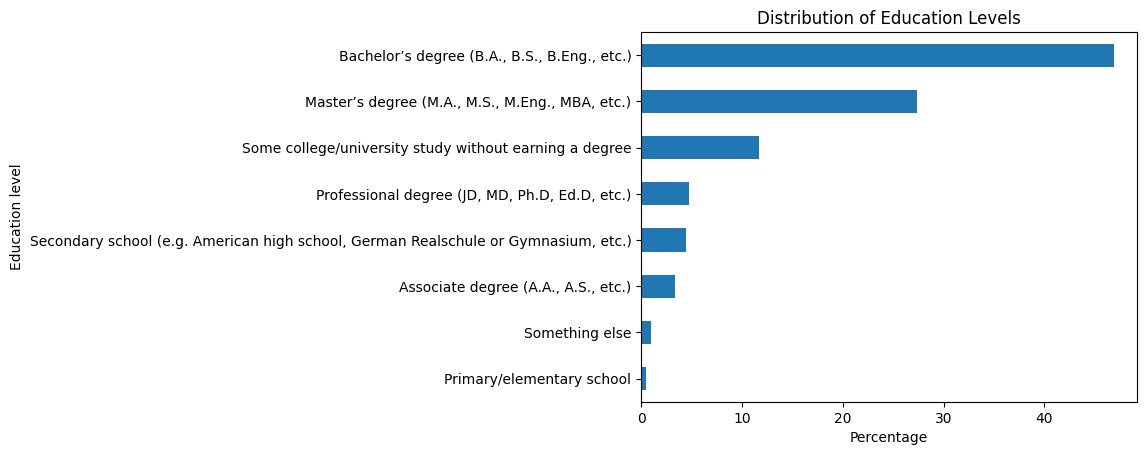

In [555]:
percent_spread=data['EdLevel'].value_counts(normalize=True)*100
percent_spread=percent_spread.sort_values()
percent_spread.plot(kind='barh')
plt.title("Distribution of Education Levels")
plt.xlabel("Percentage")
plt.ylabel("Education level")
plt.show()

Finding the developers learning platform/method

In [556]:
data['LearnCode'].value_counts()

LearnCode
Other online resources (e.g., videos, blogs, forum)                                                                                                                                                                                    1926
Books / Physical media;Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                 1667
Books / Physical media;Other online resources (e.g., videos, blogs, forum)                                                                                                                                                             1571
Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)                                                                                                                             1550
Books / Physical media;Online Courses or Certi

Splitting the values at the semicolon

In [557]:
learn_methods=data['LearnCode'].str.split(";").explode()
method_counts=learn_methods.value_counts()
method_counts

LearnCode
Other online resources (e.g., videos, blogs, forum)    37689
On the job training                                    25880
Books / Physical media                                 25456
School (i.e., University, College, etc)                23656
Online Courses or Certification                        23190
Colleague                                              12800
Friend or family member                                 4699
Coding Bootcamp                                         3959
Hackathons (virtual or in-person)                       3543
Other (please specify):                                 2817
Name: count, dtype: int64

In [558]:
method_percentage=(method_counts/89184)*100
method_percentage

LearnCode
Other online resources (e.g., videos, blogs, forum)    42.259822
On the job training                                    29.018658
Books / Physical media                                 28.543236
School (i.e., University, College, etc)                26.524937
Online Courses or Certification                        26.002422
Colleague                                              14.352350
Friend or family member                                 5.268882
Coding Bootcamp                                         4.439137
Hackathons (virtual or in-person)                       3.972686
Other (please specify):                                 3.158638
Name: count, dtype: float64

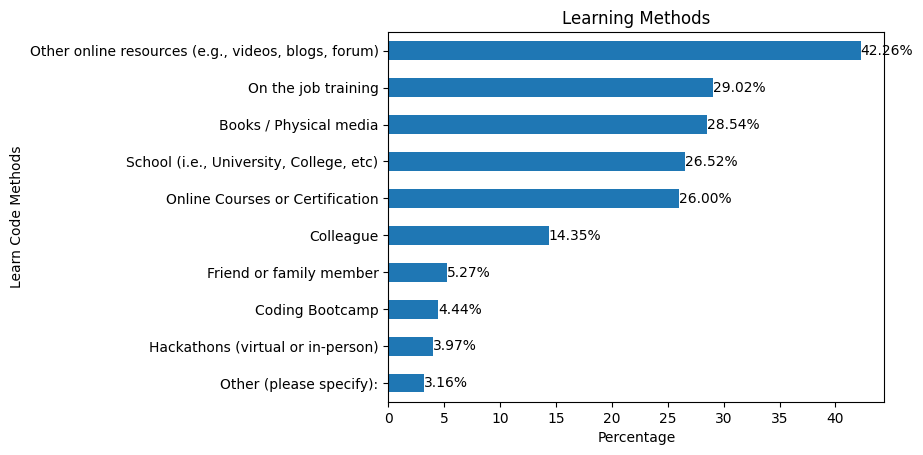

In [559]:
method_percentage=method_percentage.sort_values()
method_percentage.plot(kind='barh')
plt.title("Learning Methods")
plt.xlabel("Percentage")
plt.ylabel("Learn Code Methods")
for index,value in enumerate(method_percentage):
    plt.text(value,index,f'{value:.2f}%',va='center')
plt.show()

Finding which online platform was used by developers to learn

In [560]:
online_platform_respones=data[data['LearnCodeCoursesCert']!=np.nan]
response_count=online_platform_respones['LearnCodeCoursesCert'].count()
online_platform=data['LearnCodeCoursesCert'].str.split(";").explode()
online_platform_counts=online_platform.value_counts()
online_platform_counts

LearnCodeCoursesCert
Udemy          13521
Coursera        6717
Pluralsight     5643
Codecademy      4630
Other           3988
edX             2635
Udacity         2158
Skillsoft        317
Name: count, dtype: int64

In [561]:
online_platform_percentage=(online_platform_counts/response_count)*100
online_platform_percentage

LearnCodeCoursesCert
Udemy          66.992023
Coursera       33.280484
Pluralsight    27.959174
Codecademy     22.940098
Other          19.759203
edX            13.055542
Udacity        10.692167
Skillsoft       1.570629
Name: count, dtype: float64

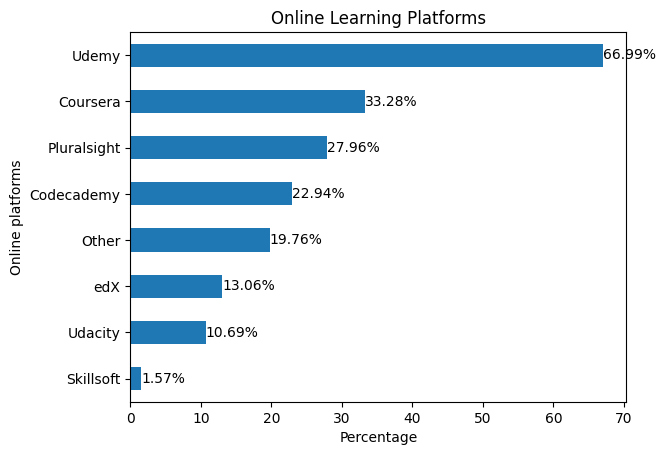

In [562]:
online_platform_percentage=online_platform_percentage.sort_values()
online_platform_percentage.plot(kind='barh')
plt.title("Online Learning Platforms")
plt.xlabel("Percentage")
plt.ylabel("Online platforms")
for index,value in enumerate(online_platform_percentage):
    plt.text(value,index,f'{value:.2f}%',va='center')
plt.show()